Exploration Data Analysis and Classification based on penguins.csv dataset

More comments right down below :)

In [49]:
import pandas as pd
penguins = pd.read_csv('penguins.csv')
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [50]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [51]:
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
target = 'Species'
X, y = penguins[features], penguins[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0



y:


0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 344, dtype: int64

In [52]:
pd.Series(y).value_counts(normalize=True)

Species
0    0.441860
1    0.360465
2    0.197674
Name: proportion, dtype: float64

In [53]:
X.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Unique values: 165


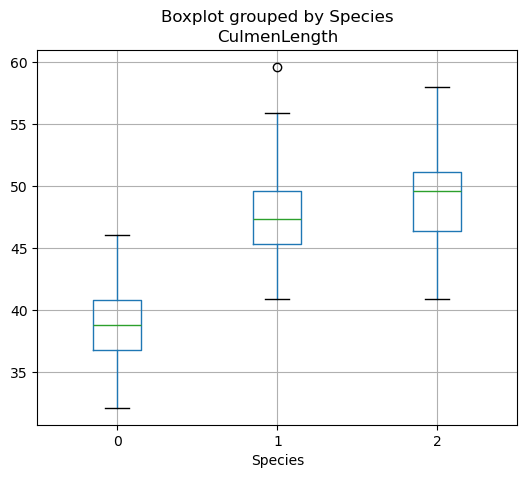

Unique values: 81


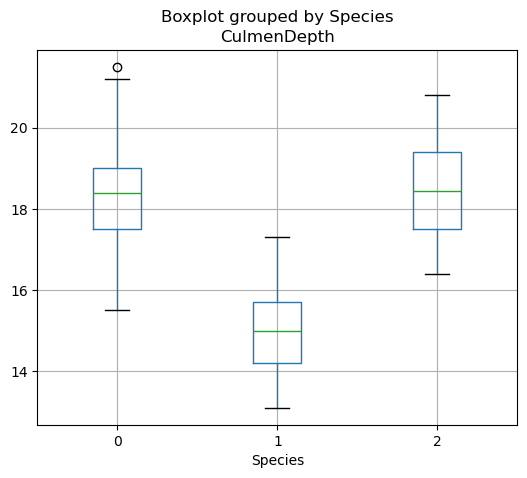

Unique values: 56


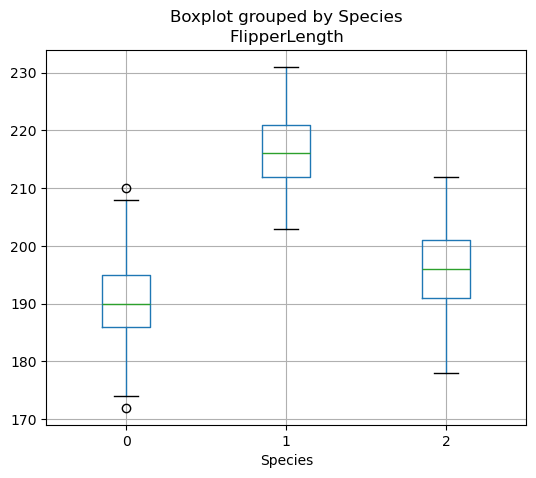

Unique values: 95


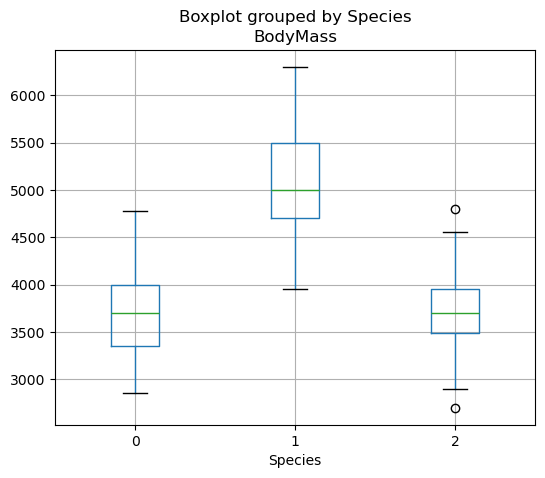

In [58]:
import matplotlib.pyplot as plt

for col in features:
    print(f'Unique values: {len(penguins[col].unique())}')
    penguins.boxplot(column=col, by='Species', figsize=(6,5))
    plt.title(col)
    plt.show()

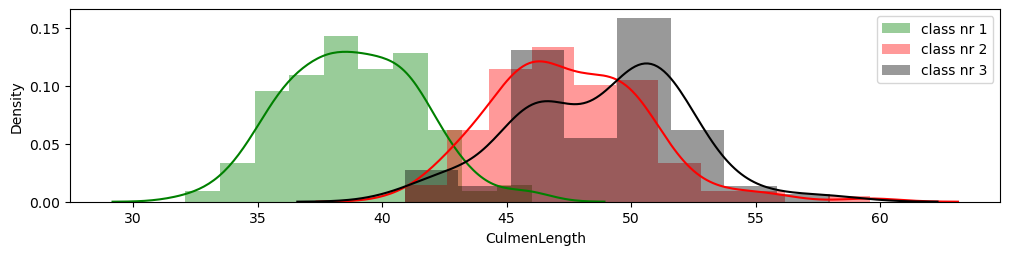

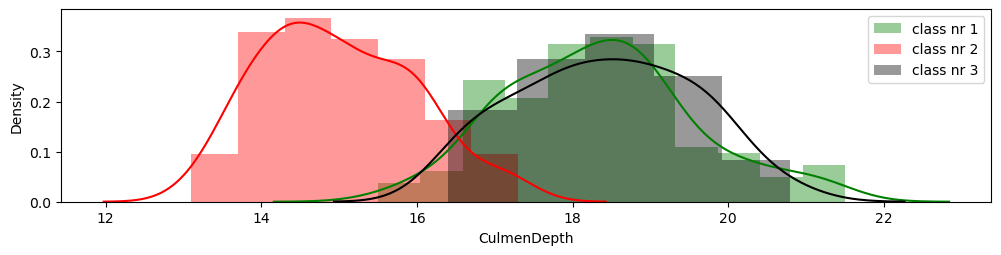

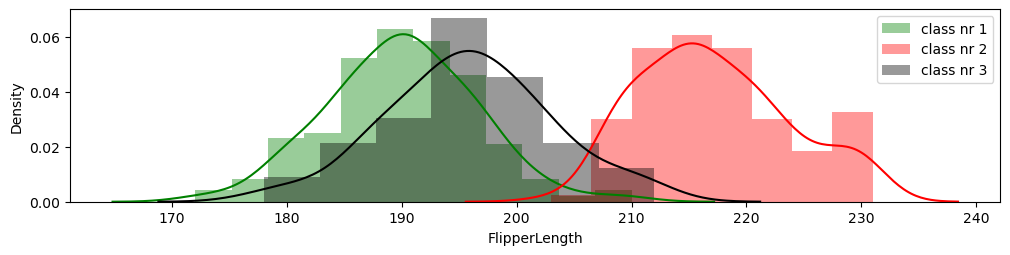

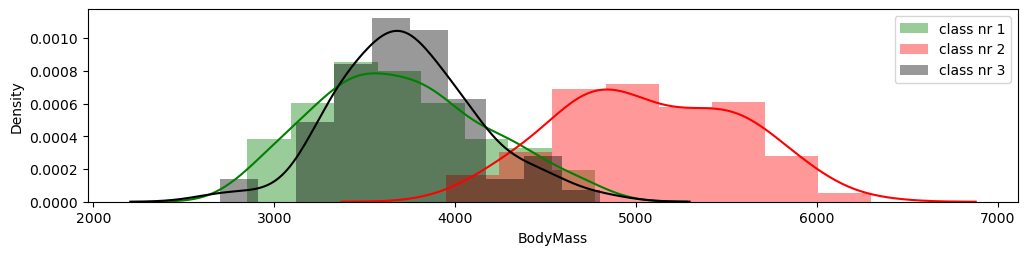

In [59]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

for col in features:
    plt.figure(figsize=(12,2.5))
    sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='class nr 1')
    sns.distplot(penguins.loc[penguins['Species']==1, col], kde=True, color='red', label='class nr 2')
    sns.distplot(penguins.loc[penguins['Species']==2, col], kde=True, color='black', label='class nr 3')
    plt.legend(loc='upper right')
    plt.show()

Culmenlength - the lower the values, the greater the probability that it is class 1, species 2 and 3 have similar data density in higher values.
Culmendepth - the higher the values the greater the probability that it is class 1 and 3.
Flipperlength - the opposite situation to culmendepth, higher values indicates species 2, lower values are 1 and 3.
Bodymass - the opposite situation to culmendepth but similar to flipperlength.

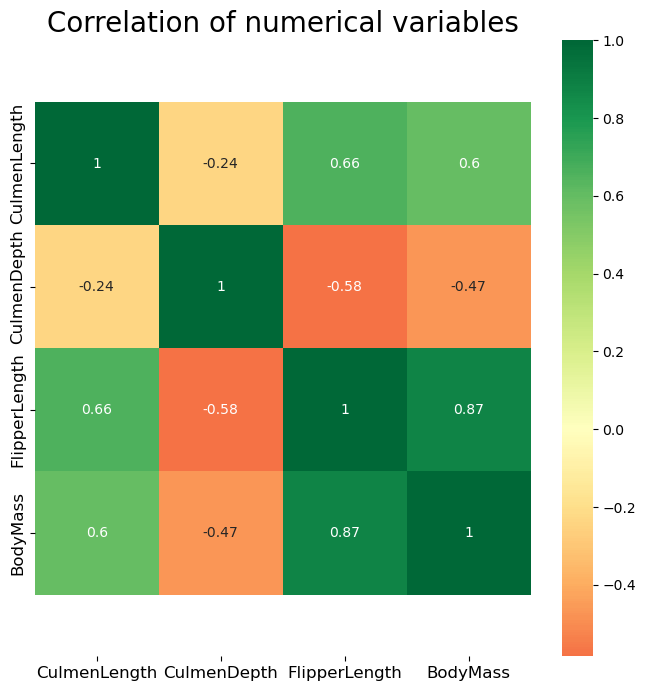

In [60]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)
plt.title('Correlation of numerical variables', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The biggest data correlation is between flipperlength and bodymass.

In [62]:
print(X.isnull().sum()) 
print(y.isnull().sum())       

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
dtype: int64
0


In [63]:
X = X.fillna(X.mean())

In [64]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

CulmenLength     0.778622
FlipperLength    0.356905
BodyMass         0.209385
CulmenDepth     -0.182800
dtype: float64

Conclusion: Class of species the most depends on culmenlength and flipperlength

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['CulmenLength', 'FlipperLength']], y, test_size=0.30, random_state=0, stratify=y)
print('Train dataset: %d\nTest dataset: %d' % (X_train.shape[0], X_test.shape[0]))

Train dataset: 240
Test dataset: 104


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

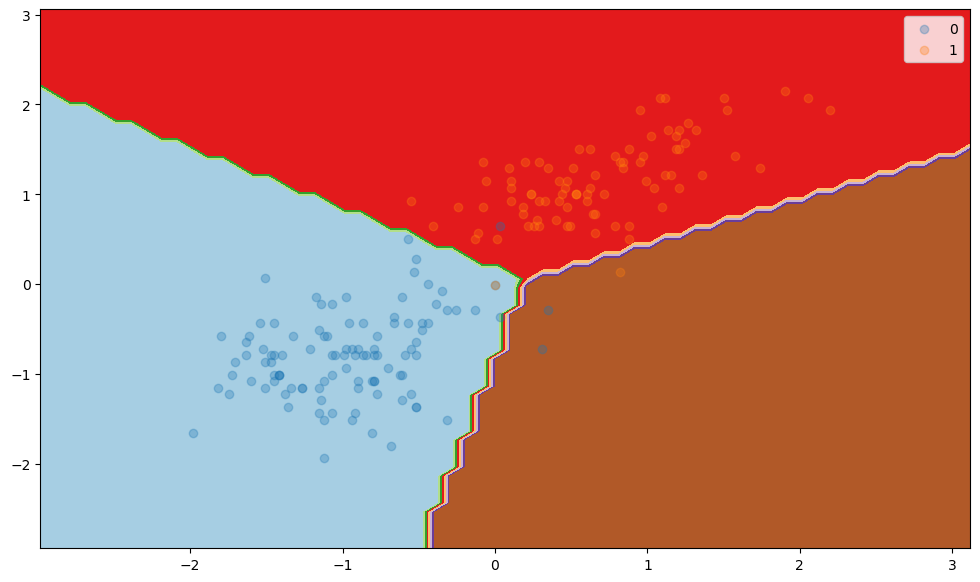

In [68]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))
    
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    xx, yy = meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    grid = hstack((r1,r2))
    yhat = trained_model.predict(grid)

    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='Paired')

    for class_value in range(2):
        row_ix = where(y_plot == class_value)
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

The model classifies very well. There are few classification mistakes.

In [70]:
predictions_lr = model_lr.predict(X_test_standardized)
print('Predicted labels: ',predictions_lr[:5], predictions_lr[-5:])
print('Actual labels:    ', y_test[:5].values, y_test[-5:].values)

Predicted labels:  [0 0 0 2 0] [0 0 1 2 2]
Actual labels:     [0 0 0 2 2] [0 0 1 2 2]


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print("Precision:", precision_score(y_test, predictions_lr, average='macro'))
print("Recall:", recall_score(y_test, predictions_lr, average='macro'))
print("F1_score:", f1_score(y_test, predictions_lr, average='macro'))

Accuracy:  0.9519230769230769
Precision: 0.9518762183235868
Recall: 0.9292615596963424
F1_score: 0.9386361156573922


Conclusion: high accuracy, model predicts very well. High precision indicates that model has only few false positive scores. Recall - model finds almost all true positive scores. F1 score - model recognizes positive values and minimizes false positive and false negative values

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.97      1.00      0.99        37
           2       0.94      0.81      0.87        21

    accuracy                           0.95       104
   macro avg       0.95      0.93      0.94       104
weighted avg       0.95      0.95      0.95       104



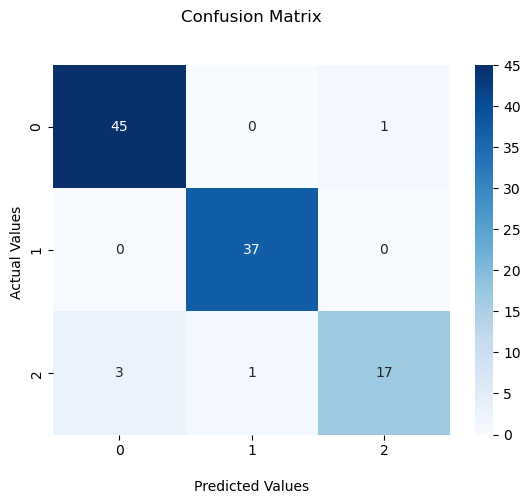

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

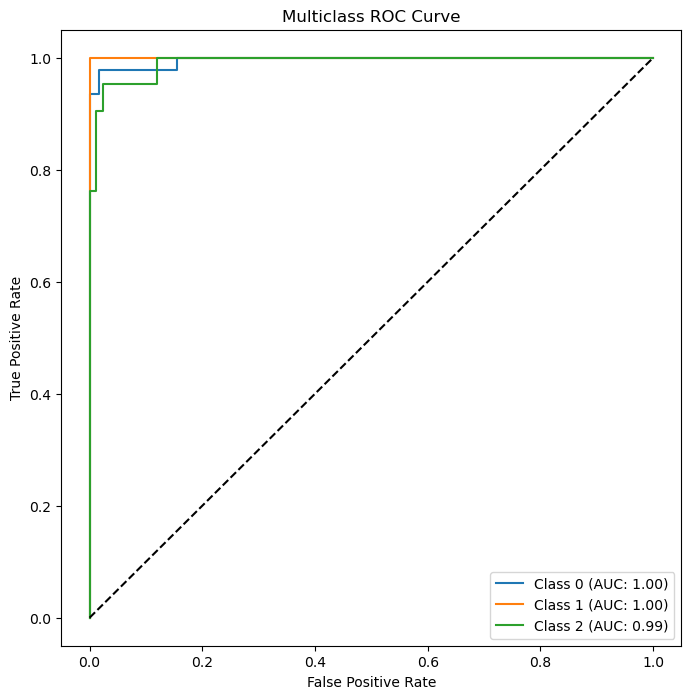

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

predictions_probability_lr = model_lr.predict_proba(X_test_standardized)
classes = np.unique(y_test)

plt.figure(figsize=(8, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test == class_label, predictions_probability_lr[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC: {roc_auc_score(y_test == class_label, predictions_probability_lr[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.97      1.00      0.99        37
           2       0.94      0.81      0.87        21

    accuracy                           0.95       104
   macro avg       0.95      0.93      0.94       104
weighted avg       0.95      0.95      0.95       104



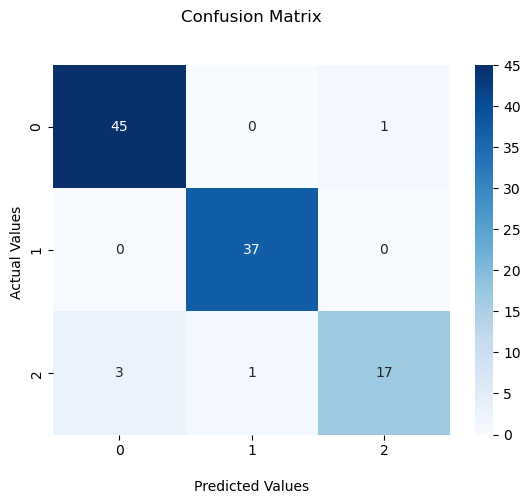

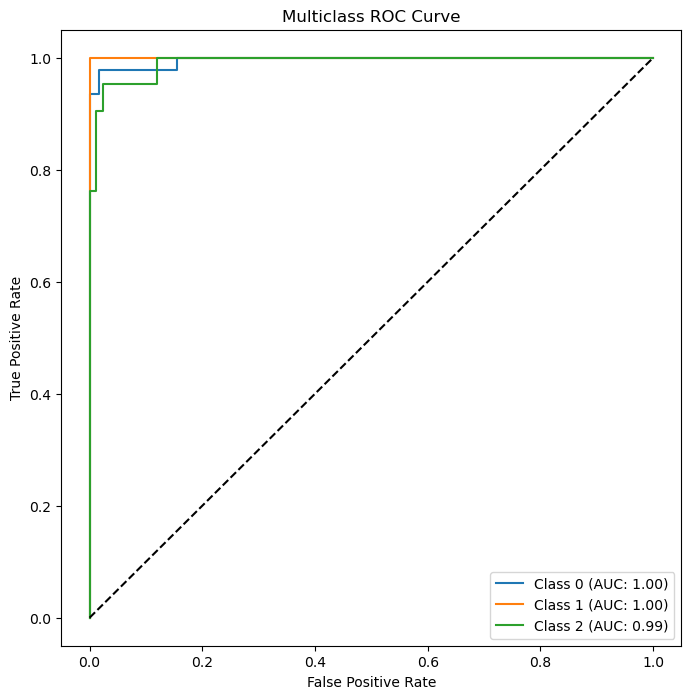

,Model,F1_score,AUC
0,Logistic Regression,0.950547,0.995757


In [76]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba)

    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # ROC curve
    classes = np.unique(y_checked)
    plt.figure(figsize=(8, 8))
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_checked == class_label, predictions_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {class_label} (AUC: {roc_auc_score(y_checked == class_label, predictions_proba[:, i]):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions, average='weighted')
    auc_metric = roc_auc_score(y_checked, predictions_proba, multi_class='ovr')
    new_row = pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)
    
    return metrics_dataframe

calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

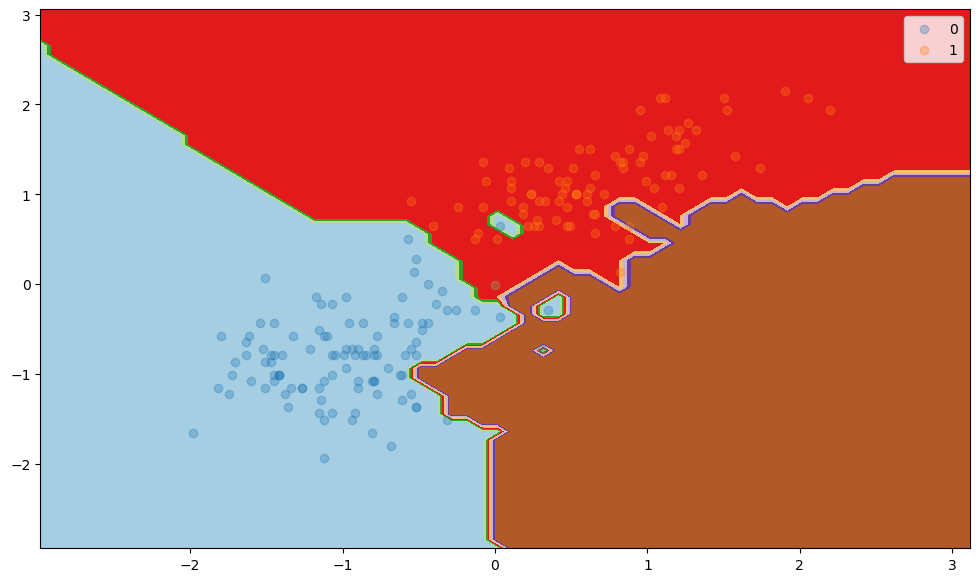

In [77]:
from sklearn.neighbors import KNeighborsClassifier
import math
n_neighbors = max(1, int(X_train_standardized.shape[0] * 0.001))

model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
model_knn.fit(X_train_standardized, y_train)

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_knn)


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.97      1.00      0.99        37
           2       0.94      0.81      0.87        21

    accuracy                           0.95       104
   macro avg       0.95      0.93      0.94       104
weighted avg       0.95      0.95      0.95       104



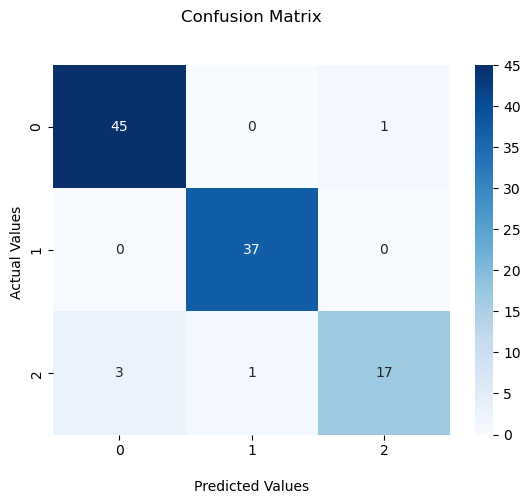

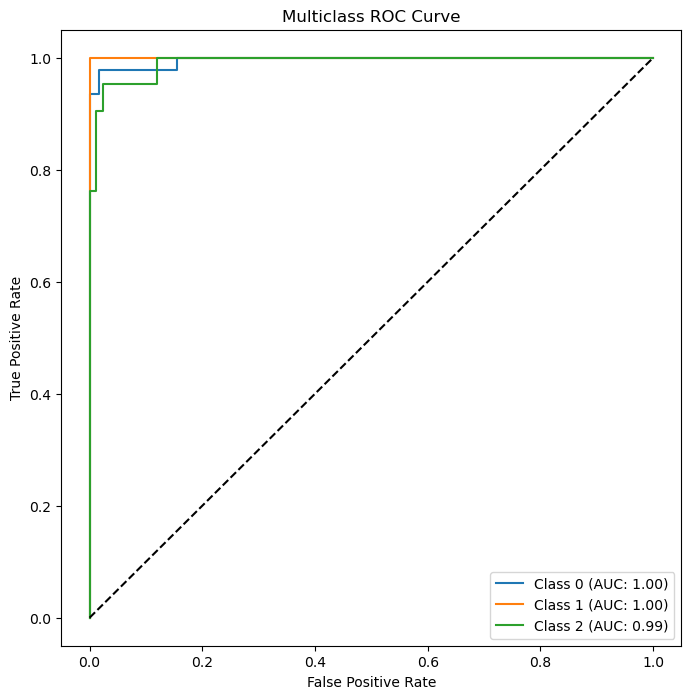

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.97      0.95      0.96        37
           2       0.83      0.95      0.89        21

    accuracy                           0.95       104
   macro avg       0.94      0.95      0.94       104
weighted avg       0.96      0.95      0.95       104



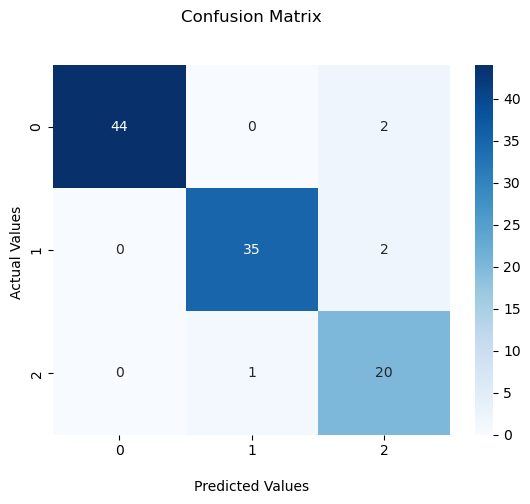

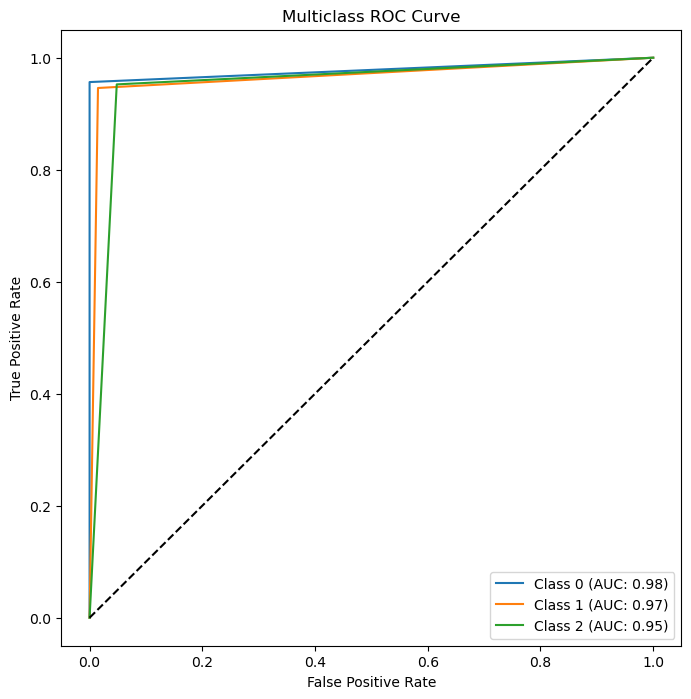

,Model,F1_score,AUC
0,Logistic Regression,0.950547,0.995757
1,KNN,0.953114,0.965288


In [78]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba)

    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # ROC curve
    classes = np.unique(y_checked)  
    plt.figure(figsize=(8, 8))
    for i, class_label in enumerate(classes):
    
        fpr, tpr, _ = roc_curve(y_checked == class_label, predictions_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {class_label} (AUC: {roc_auc_score(y_checked == class_label, predictions_proba[:, i]):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions, average='weighted')
    auc_metric = roc_auc_score(y_checked, predictions_proba, multi_class='ovr')
    new_row = pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)
    
    return metrics_dataframe

calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)
calculate_metrics(model_knn, 'KNN', X_test_standardized, y_test)

In [79]:
from sklearn.tree import DecisionTreeClassifier
import math

min_samples_leaf = max(1, int(X_train.shape[0]*0.001))

model_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=min_samples_leaf)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

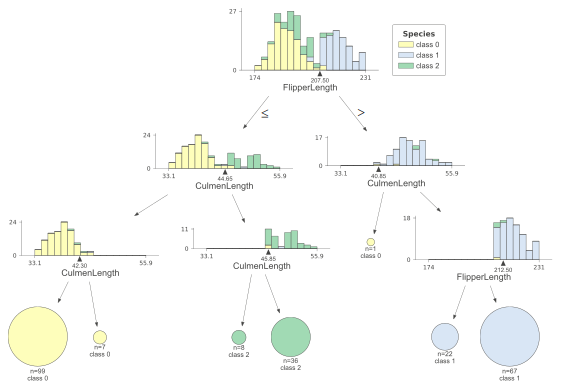

In [80]:
from dtreeviz import trees

viz = trees.dtreeviz(model_tree, x_data=X_train, y_data=y_train,
                     target_name='Species', feature_names=X_train.columns)
viz

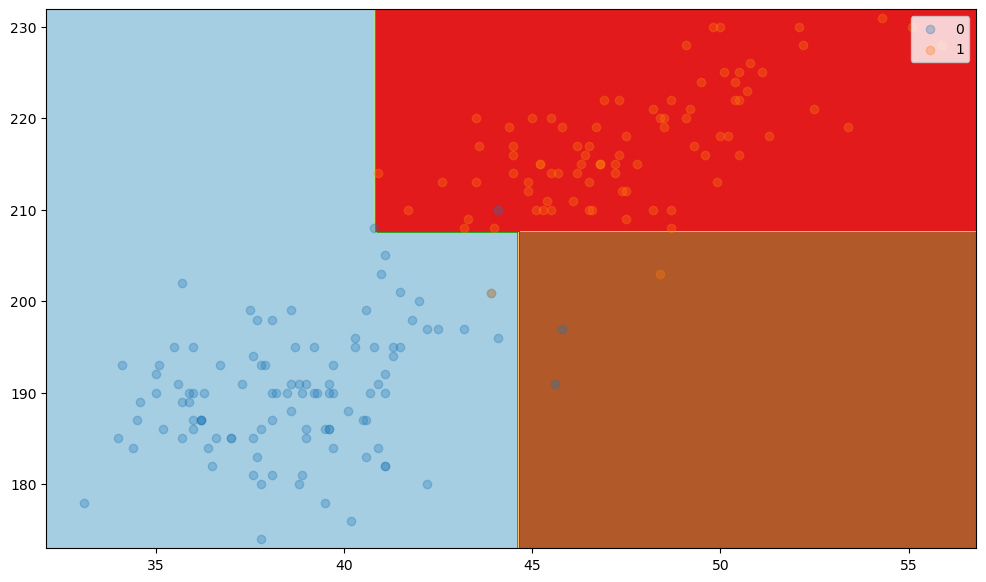

In [81]:
import numpy as np

plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_tree)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.97      0.97      0.97        37
           2       0.89      0.81      0.85        21

    accuracy                           0.94       104
   macro avg       0.94      0.92      0.93       104
weighted avg       0.94      0.94      0.94       104



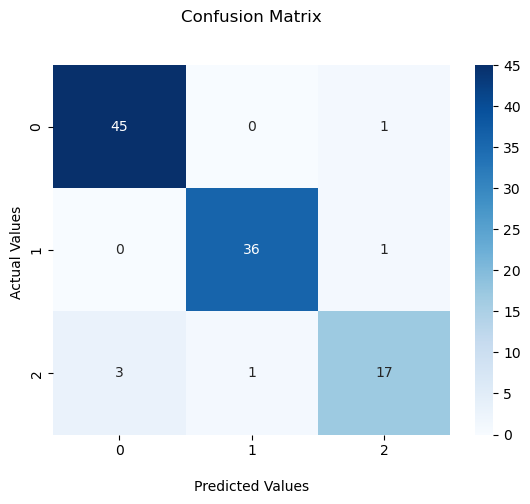

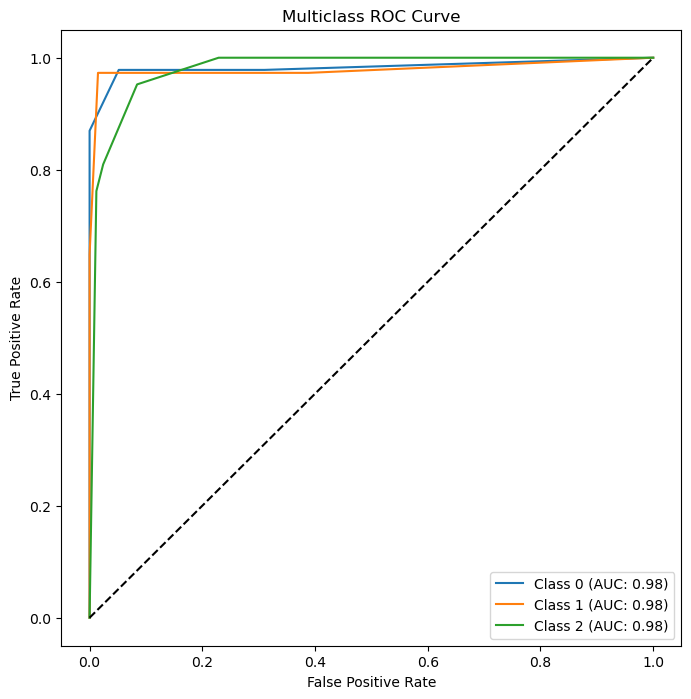

,Model,F1_score,AUC
0,Logistic Regression,0.950547,0.995757
1,KNN,0.953114,0.965288
2,Tree,0.941275,0.980371


In [82]:
calculate_metrics(model_tree, 'Tree', X_test, y_test)

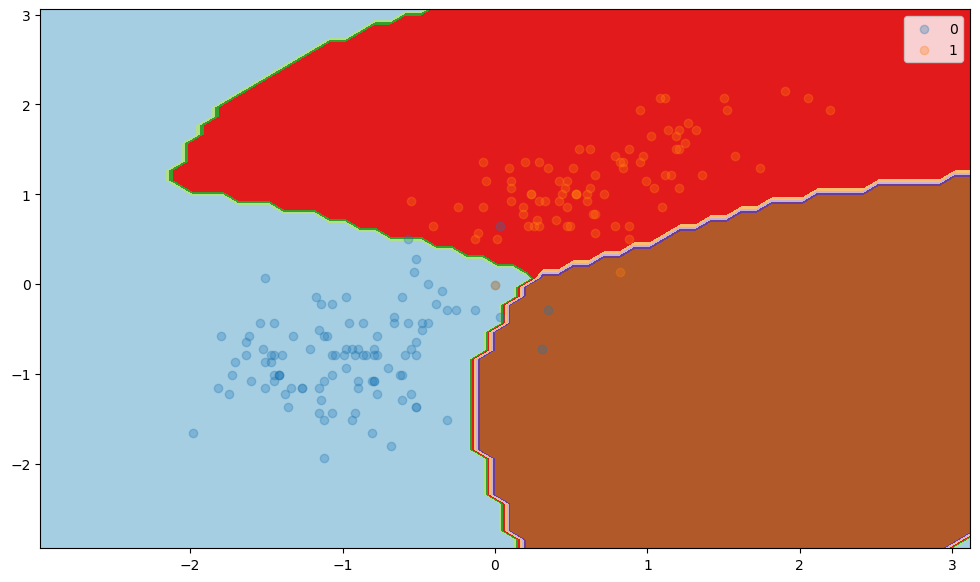

In [83]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_svm)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.97      1.00      0.99        37
           2       0.94      0.81      0.87        21

    accuracy                           0.95       104
   macro avg       0.95      0.93      0.94       104
weighted avg       0.95      0.95      0.95       104



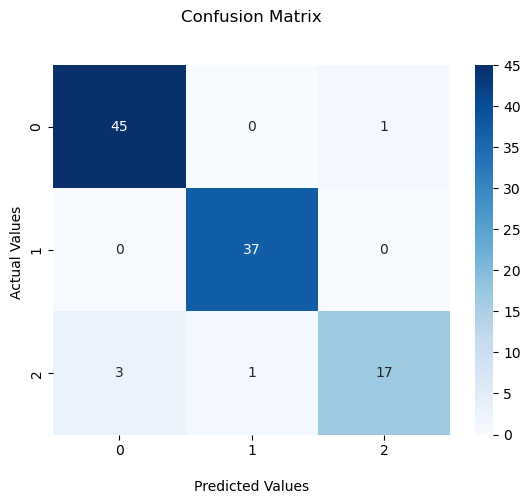

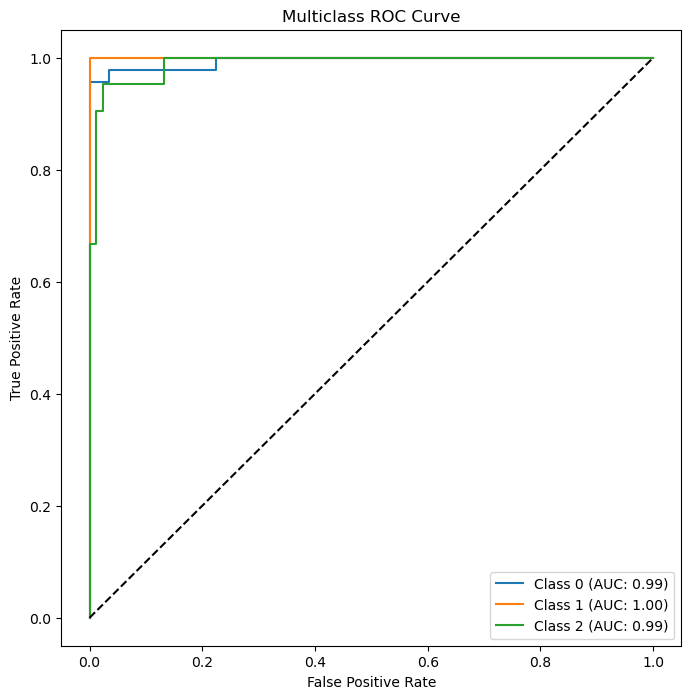

,Model,F1_score,AUC
0,Logistic Regression,0.950547,0.995757
1,KNN,0.953114,0.965288
2,Tree,0.941275,0.980371
3,SVM,0.950547,0.994684


In [84]:
calculate_metrics(model_svm, 'SVM', X_test_standardized, y_test)

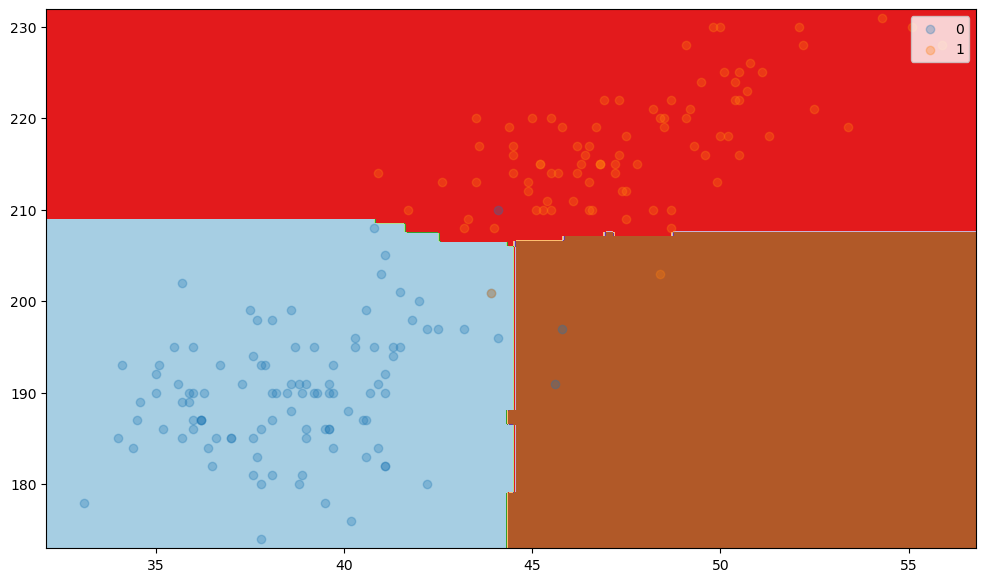

In [85]:
from sklearn.ensemble import RandomForestClassifier

min_samples_leaf = max(1, int(X_train.shape[0]*0.001))

model_forest = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=min_samples_leaf)
model_forest.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_forest)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.97      1.00      0.99        37
           2       0.94      0.81      0.87        21

    accuracy                           0.95       104
   macro avg       0.95      0.93      0.94       104
weighted avg       0.95      0.95      0.95       104



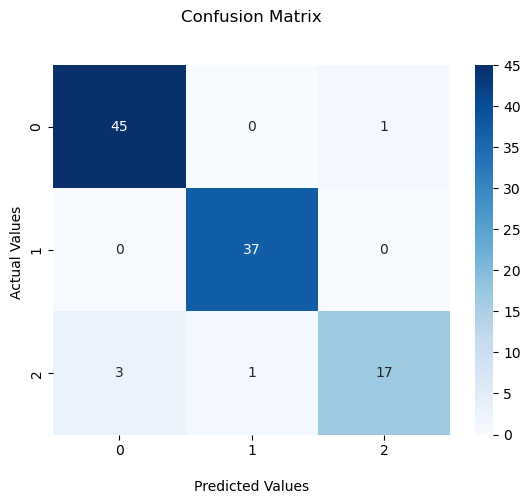

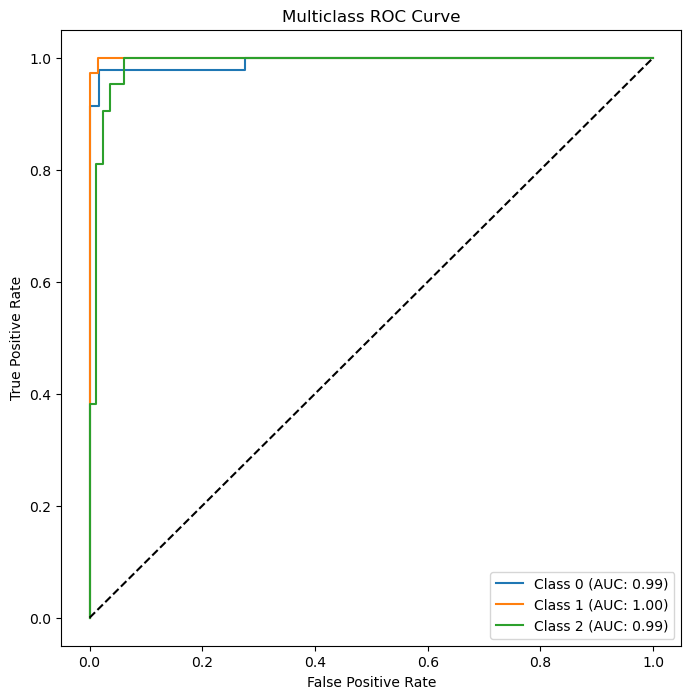

,Model,F1_score,AUC
0,Logistic Regression,0.950547,0.995757
1,KNN,0.953114,0.965288
2,Tree,0.941275,0.980371
3,SVM,0.950547,0.994684
4,RandomForest,0.950547,0.993476


In [86]:
calculate_metrics(model_forest, 'RandomForest', X_test, y_test)

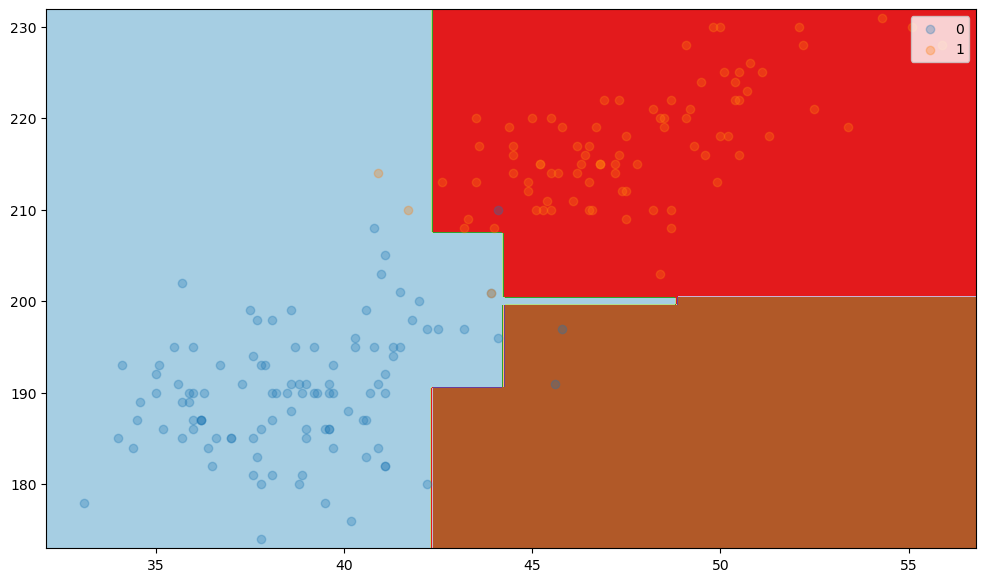

In [87]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
model_adaboost.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_adaboost)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        46
           1       0.92      0.97      0.95        37
           2       0.94      0.81      0.87        21

    accuracy                           0.94       104
   macro avg       0.94      0.92      0.93       104
weighted avg       0.94      0.94      0.94       104



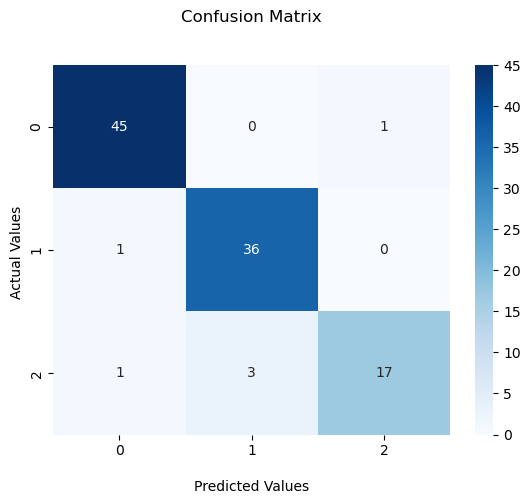

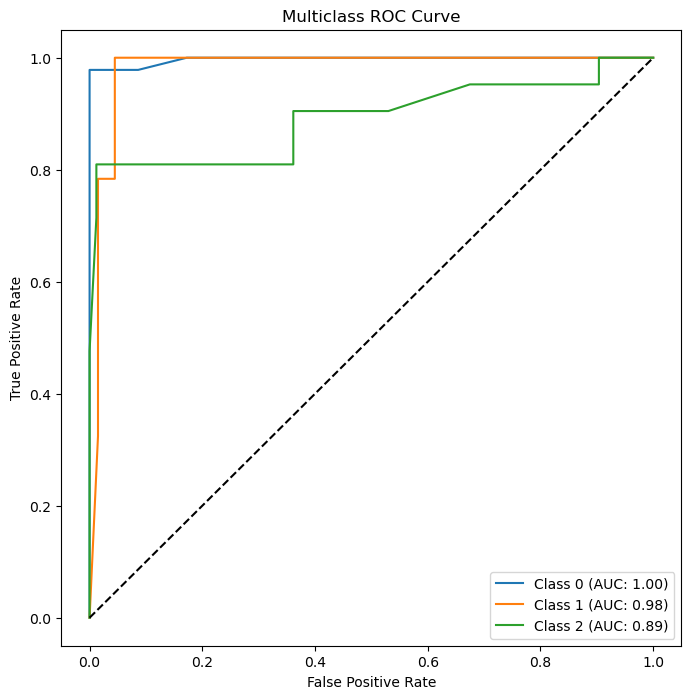

,Model,F1_score,AUC
0,Logistic Regression,0.950547,0.995757
1,KNN,0.953114,0.965288
2,Tree,0.941275,0.980371
3,SVM,0.950547,0.994684
4,RandomForest,0.950547,0.993476
5,AdaBoost,0.941120,0.956503


In [88]:
calculate_metrics(model_adaboost, 'AdaBoost', X_test, y_test)

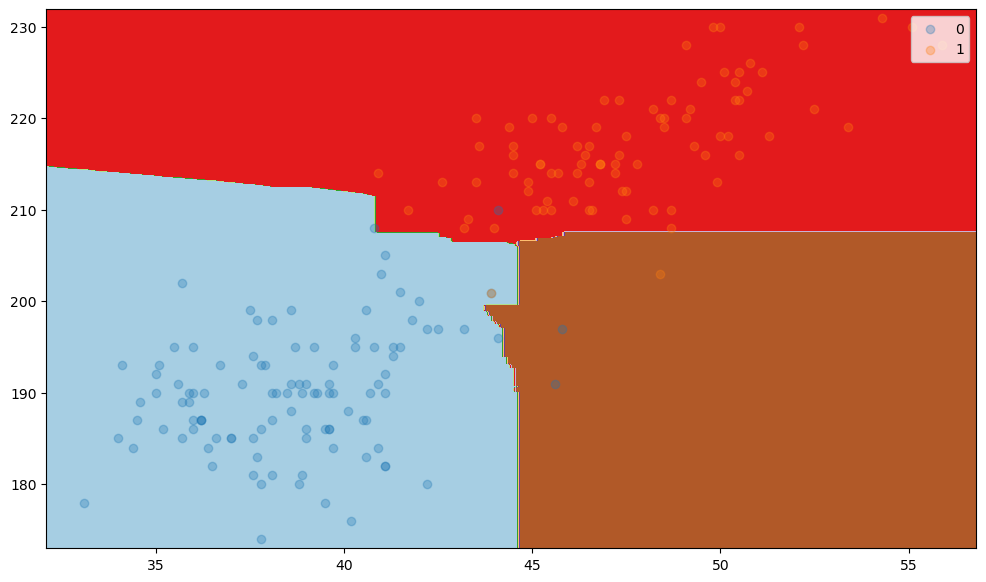

In [89]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('AdaBoost', model_adaboost),
                                            ('RandomForest', model_forest),
                                            ('SVM', model_svm),
                                            ('Tree', model_tree)],
                                voting='soft')
model_voting.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_voting)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.97      1.00      0.99        37
           2       0.94      0.81      0.87        21

    accuracy                           0.95       104
   macro avg       0.95      0.93      0.94       104
weighted avg       0.95      0.95      0.95       104



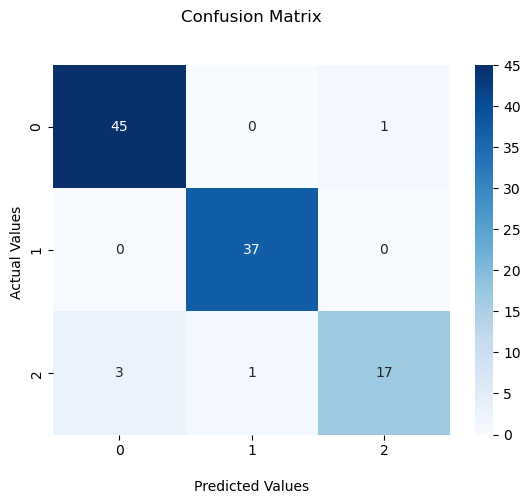

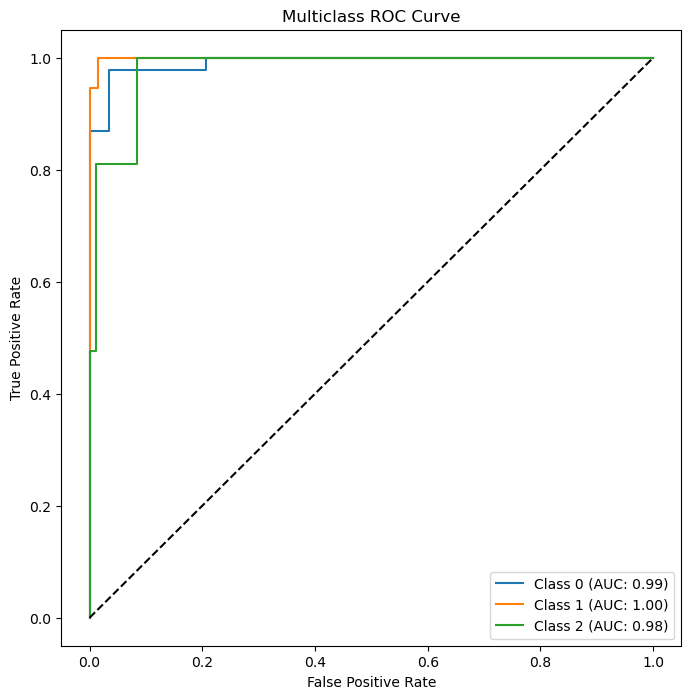

,Model,F1_score,AUC
0,Logistic Regression,0.950547,0.995757
1,KNN,0.953114,0.965288
2,Tree,0.941275,0.980371
3,SVM,0.950547,0.994684
4,RandomForest,0.950547,0.993476
5,AdaBoost,0.941120,0.956503
6,VotingClassifier,0.950547,0.990289


In [90]:
calculate_metrics(model_voting, 'VotingClassifier', X_test, y_test)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

In [92]:
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3,5,10,20],
             'min_samples_leaf':[3,5,10,15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 3, 'min_samples_leaf': 5}


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        46
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       104
   macro avg       0.97      0.96      0.96       104
weighted avg       0.97      0.97      0.97       104



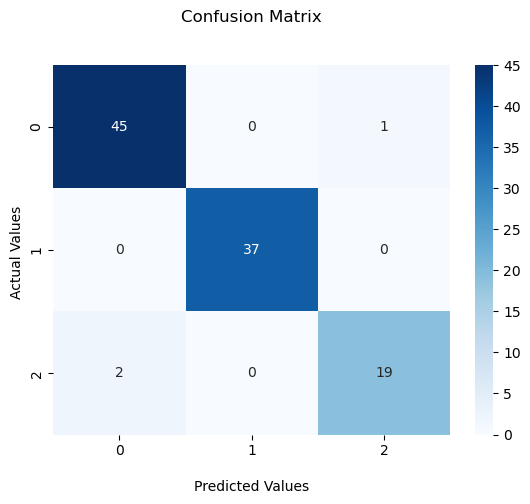

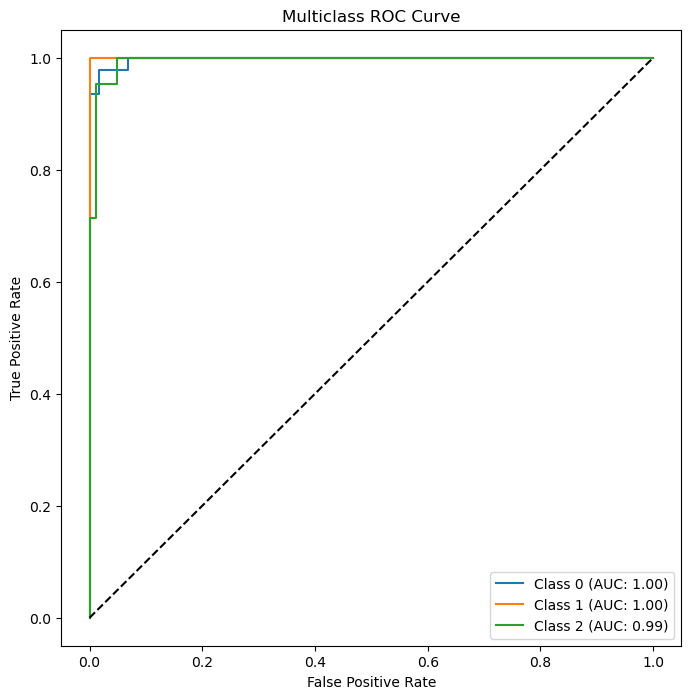

,Model,F1_score,AUC
0,Logistic Regression,0.950547,0.995757
1,KNN,0.953114,0.965288
2,Tree,0.941275,0.980371
3,SVM,0.950547,0.994684
4,RandomForest,0.950547,0.993476
5,AdaBoost,0.941120,0.956503
6,VotingClassifier,0.950547,0.990289
7,RandomForestv2,0.970957,0.997529


In [93]:
calculate_metrics(rf_model_v2, 'RandomForestv2', X_test, y_test)

GridSearch improves results significantly.